In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [4]:
trainData = ImageDataGenerator()
trainingdt = trainData.flow_from_directory(directory='RealvsFake/Training', target_size=(96,96))


Found 101965 images belonging to 2 classes.


In [5]:
testData = ImageDataGenerator()
testingdt = testData.flow_from_directory(directory='RealvsFake/Testing', target_size=(96,96))

Found 20076 images belonging to 2 classes.


In [6]:
def preprocess(file_path):
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
        img = tf.image.resize(img, (96,96))
        img = img / 255.0
        return img

In [7]:
model = Sequential()

pretrained_model= tf.keras.applications.DenseNet121(include_top=False,
                   input_shape= (96,96,3),
                   pooling='max',classes=2,
                   weights='imagenet')

model.add(pretrained_model)

In [8]:

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 7,341,186
Trainable params: 7,257,538
Non-

In [11]:

model.compile(optimizer=Adam(lr=3e-4),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(trainingdt,validation_data= testingdt,epochs=10,steps_per_epoch=100) 

Epoch 1/10
100/100 [==============================] - 811s 8s/step - loss: 0.2614 - acc: 0.9038 - val_loss: 0.5380 - val_acc: 0.8565
Epoch 2/10
100/100 [==============================] - 774s 8s/step - loss: 0.2511 - acc: 0.9038 - val_loss: 0.5194 - val_acc: 0.8021
Epoch 3/10
100/100 [==============================] - 773s 8s/step - loss: 0.2378 - acc: 0.9100 - val_loss: 0.2191 - val_acc: 0.9103
Epoch 4/10
100/100 [==============================] - 775s 8s/step - loss: 0.2009 - acc: 0.9172 - val_loss: 0.8427 - val_acc: 0.7791
Epoch 5/10
100/100 [==============================] - 771s 8s/step - loss: 0.2102 - acc: 0.9147 - val_loss: 0.2514 - val_acc: 0.9117
Epoch 6/10
100/100 [==============================] - 768s 8s/step - loss: 0.1799 - acc: 0.9266 - val_loss: 0.1824 - val_acc: 0.9305
Epoch 7/10
100/100 [==============================] - 764s 8s/step - loss: 0.1794 - acc: 0.9322 - val_loss: 0.1919 - val_acc: 0.9269
Epoch 8/10
100/100 [==============================] - 752s 8s/step - 

In [12]:
model.save('densenet121.h5')

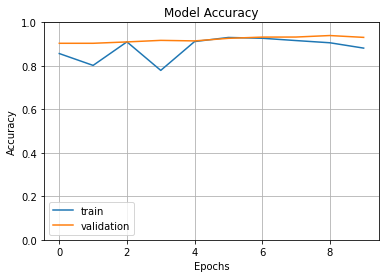

In [15]:
fig1 = plt.gcf()
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])

plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

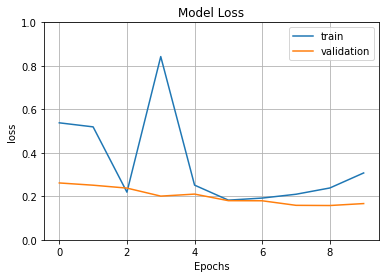

In [16]:
fig1 = plt.gcf()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# reload model
model = tf.keras.models.load_model('densenet121.h5')

In [ ]:
# reload model

model = tf.keras.models.load_model('densenet121.h5' ,
                                  custom_objects={'BinaryCrossentropy' :tf.losses.BinaryCrossentropy})

In [ ]:
for im in os.listdir(os.path.join('application data', 'input data')):
    results= verify(model)
    print(results)